<a href="https://colab.research.google.com/github/Whyawww/DashboardDynamicBuzz/blob/main/Analisis_Influencer_Instagram_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()
#upload kaggle.json

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d faisaljanjua0555/top-200-most-followed-instagram-accounts-2023

Dataset URL: https://www.kaggle.com/datasets/faisaljanjua0555/top-200-most-followed-instagram-accounts-2023
License(s): copyright-authors
  0% 0.00/4.67k [00:00<?, ?B/s]
100% 4.67k/4.67k [00:00<00:00, 16.0MB/s]


# **EDA**

In [ ]:
import pandas as pd
import zipfile
import os

with zipfile.ZipFile("top-200-most-followed-instagram-accounts-2023.zip", 'r') as zip_ref:
    zip_ref.extractall("ig_dataset")

print("Contents of ig_dataset:")
!ls ig_dataset

extracted_files = os.listdir("ig_dataset")
csv_files = [f for f in extracted_files if f.endswith('.csv')]

if len(csv_files) == 1:
    csv_filename = csv_files[0]
    csv_filepath = os.path.join("ig_dataset", csv_filename)
    print(f"Loading CSV file: {csv_filepath}")
    df = pd.read_csv(csv_filepath)
    print(df.head())
elif len(csv_files) > 1:
    print("Multiple CSV files found. Please manually specify the correct file name:")
    print(csv_files)
else:
    print("No CSV files found in ig_dataset.")

Contents of ig_dataset:
data.csv
Loading CSV file: ig_dataset/data.csv
   rank         name channel_Info                  Category Posts Followers  \
0     1    instagram        brand               photography  7.3K    580.1M   
1     2    cristiano         male  Health, Sports & Fitness  3.4K    519.9M   
2     3     leomessi         male  Health, Sports & Fitness    1K    403.7M   
3     4  kyliejenner       female             entertainment    7K    375.9M   
4     5  selenagomez       female             entertainment  1.8K    365.3M   

  Avg. Likes Eng Rate  
0      7.31K     0.1%  
1      3.41K     1.4%  
2      0.97K     1.7%  
3      7.02K     1.7%  
4      1.85K     1.1%  


In [ ]:
def convert_str_to_num(x):
    if isinstance(x, str):
        x = x.replace('M', 'e6').replace('K', 'e3')
        try:
            return float(eval(x))
        except:
            return None
    return x

df['Followers'] = df['Followers'].apply(convert_str_to_num)
df['Avg. Likes'] = df['Avg. Likes'].apply(convert_str_to_num)
print(df.head())

   rank         name channel_Info                  Category Posts  \
0     1    instagram        brand               photography  7.3K   
1     2    cristiano         male  Health, Sports & Fitness  3.4K   
2     3     leomessi         male  Health, Sports & Fitness    1K   
3     4  kyliejenner       female             entertainment    7K   
4     5  selenagomez       female             entertainment  1.8K   

     Followers  Avg. Likes Eng Rate  
0  580100000.0      7310.0     0.1%  
1  519900000.0      3410.0     1.4%  
2  403700000.0       970.0     1.7%  
3  375900000.0      7020.0     1.7%  
4  365300000.0      1850.0     1.1%  


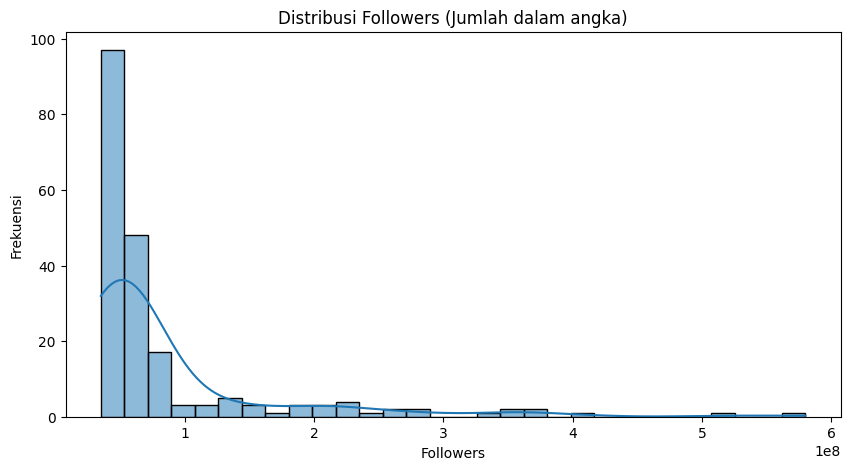

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Followers'], bins=30, kde=True)
plt.title('Distribusi Followers (Jumlah dalam angka)')
plt.xlabel('Followers')
plt.ylabel('Frekuensi')
plt.show()

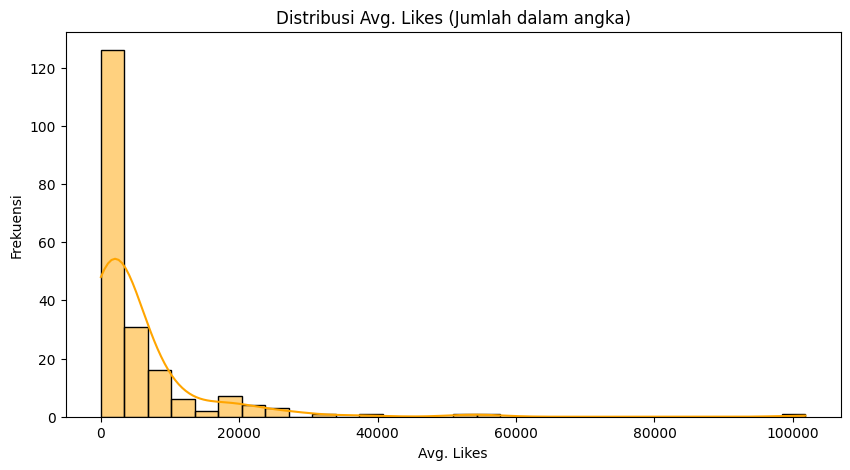

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Avg. Likes'], bins=30, kde=True, color='orange')
plt.title('Distribusi Avg. Likes (Jumlah dalam angka)')
plt.xlabel('Avg. Likes')
plt.ylabel('Frekuensi')
plt.show()


Distribusi Kategori
Category
entertainment               129
Health, Sports & Fitness     39
fashion                      10
Beauty & Makeup               3
News & Politics               3
photography                   2
technology                    2
food                          2
Lifestyle                     1
Finance                       1
Craft/DIY                     1
Name: count, dtype: int64


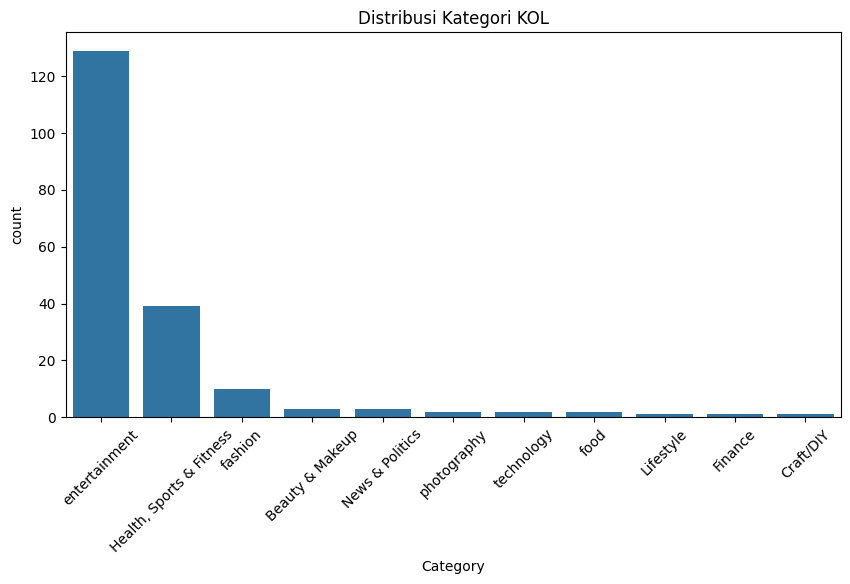

In [ ]:
print("\nDistribusi Kategori")
print(df['Category'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Distribusi Kategori KOL')
plt.xticks(rotation=45)
plt.show()

\Distribusi channel_Info
channel_Info
male         93
female       74
brand        15
community    13
Name: count, dtype: int64


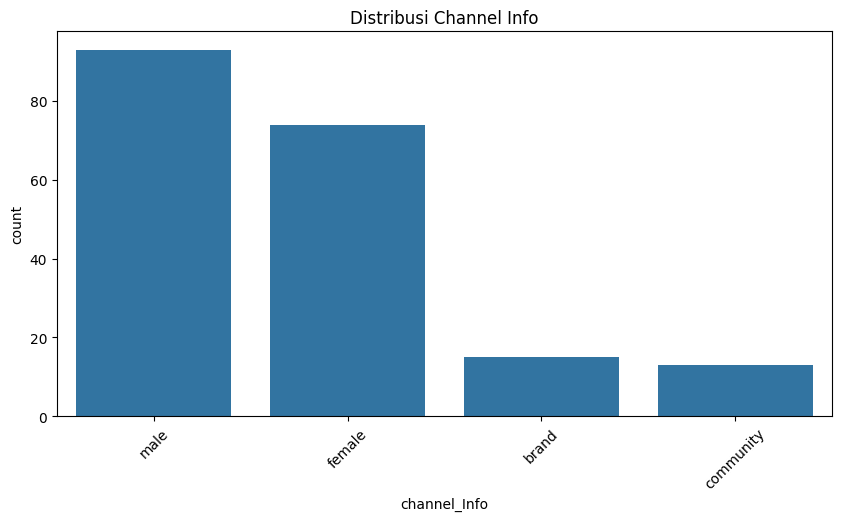

In [ ]:
if 'channel_Info' in df.columns:
    print("\Distribusi channel_Info")
    print(df['channel_Info'].value_counts())

    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='channel_Info', order=df['channel_Info'].value_counts().index)
    plt.title('Distribusi Channel Info')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
corr = df[['Followers', 'Avg. Likes']].corr().iloc[0,1]
print(f"Korelasi Pearson antara Followers dan Avg. Likes: {corr:.3f}")

Korelasi Pearson antara Followers dan Avg. Likes: -0.017


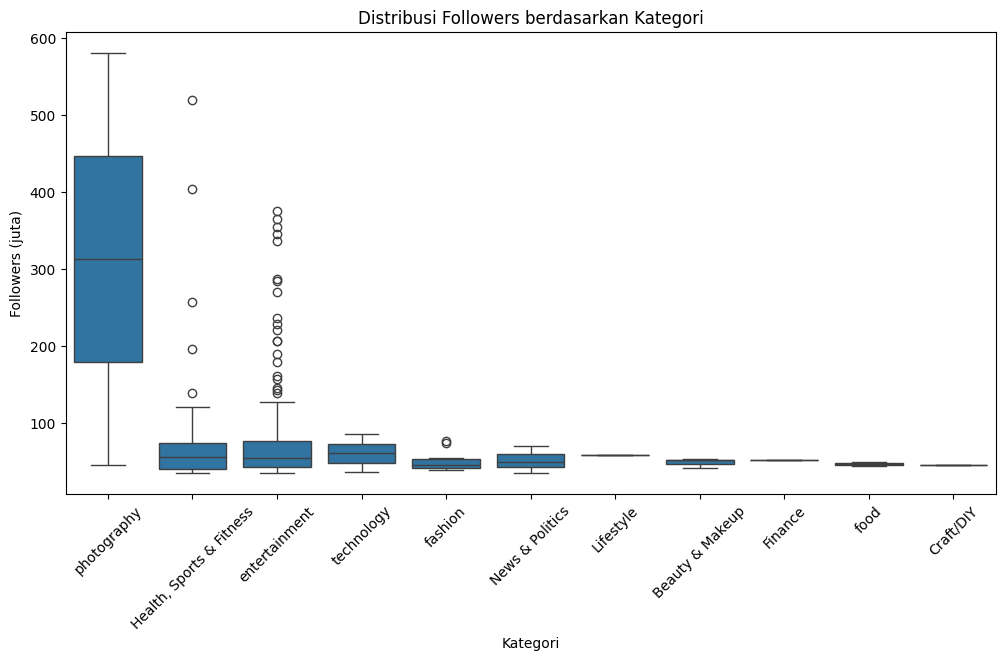

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y=df['Followers'] / 1e6)
plt.title('Distribusi Followers berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Followers (juta)')
plt.xticks(rotation=45)
plt.show()

# **Preprocessing**

Fungsi cleaning angka (k&m)

In [ ]:
def convert_to_number(x):
    print(f"Proses nilai awal: {x}")
    if isinstance(x, str):
        x = x.strip()
        if 'K' in x:
            num = float(x.replace('K', '')) * 1_000
            print(f" - Mengandung 'K', konversi ke: {num}")
            return num
        elif 'M' in x:
            num = float(x.replace('M', '')) * 1_000_000
            print(f" - Mengandung 'M', konversi ke: {num}")
            return num
        else:
            try:
                num = float(x)
                print(f" - Tidak ada 'K' atau 'M', langsung konversi ke: {num}")
                return num
            except:
                print(" - Gagal konversi, return None")
                return None
    elif isinstance(x, (int, float)):
        print(f" - Sudah numeric: {x}, langsung return")
        return x
    else:
        print(" - Tipe data tidak dikenal, return None")
        return None

# Terapkan fungsi ke kolom Posts, Followers, Avg. Likes
for col in ['Posts', 'Followers', 'Avg. Likes']:
    if col in df.columns:
        print(f"\n--- Memproses kolom: {col} ---")
        df[col] = df[col].apply(convert_to_number)
    else:
        print(f"Kolom '{col}' tidak ditemukan di dataset.")


--- Memproses kolom: Posts ---
Proses nilai awal: 7.3K
 - Mengandung 'K', konversi ke: 7300.0
Proses nilai awal: 3.4K
 - Mengandung 'K', konversi ke: 3400.0
Proses nilai awal: 1K
 - Mengandung 'K', konversi ke: 1000.0
Proses nilai awal: 7K
 - Mengandung 'K', konversi ke: 7000.0
Proses nilai awal: 1.8K
 - Mengandung 'K', konversi ke: 1800.0
Proses nilai awal: 7K
 - Mengandung 'K', konversi ke: 7000.0
Proses nilai awal: 5K
 - Mengandung 'K', konversi ke: 5000.0
Proses nilai awal: 5.7K
 - Mengandung 'K', konversi ke: 5700.0
Proses nilai awal: 2.1K
 - Mengandung 'K', konversi ke: 2100.0
Proses nilai awal: 4.2K
 - Mengandung 'K', konversi ke: 4200.0
Proses nilai awal: 7.4K
 - Mengandung 'K', konversi ke: 7400.0
Proses nilai awal: 1K
 - Mengandung 'K', konversi ke: 1000.0
Proses nilai awal: 562
 - Tidak ada 'K' atau 'M', langsung konversi ke: 562.0
Proses nilai awal: 220
 - Tidak ada 'K' atau 'M', langsung konversi ke: 220.0
Proses nilai awal: 1.5K
 - Mengandung 'K', konversi ke: 1500.0
Pro

Cleaning Engagement Rate

In [ ]:
if 'Eng Rate' in df.columns:
    df['Eng Rate'] = df['Eng Rate'].astype(str).str.replace('%', '', regex=False)
    df['Eng Rate'] = pd.to_numeric(df['Eng Rate'], errors='coerce')
    df['Eng Rate'] = df['Eng Rate'] / 100
    print(df['Eng Rate'])

0      0.001
1      0.014
2      0.017
3      0.017
4      0.011
       ...  
195    0.006
196    0.035
197    0.012
198    0.004
199    0.007
Name: Eng Rate, Length: 200, dtype: float64


Missing Value

In [ ]:
print("\nJumlah missing values sebelum penanganan:")
print(df[['Category', 'channel_Info']].isnull().sum())


Jumlah missing values sebelum penanganan:
Category        7
channel_Info    5
dtype: int64


In [ ]:
df['Category'] = df['Category'].fillna('Unknown')
if 'channel_Info' in df.columns:
    df['channel_Info'] = df['channel_Info'].fillna('Unknown')
    print(df['channel_Info'])
print("\nJumlah missing values setelah penanganan:")
print(df[['Category', 'channel_Info']].isnull().sum())

0       brand
1        male
2        male
3      female
4      female
        ...  
195      male
196      male
197      male
198    female
199    female
Name: channel_Info, Length: 200, dtype: object

Jumlah missing values setelah penanganan:
Category        0
channel_Info    0
dtype: int64


Data Clean

In [ ]:
df.to_csv('cleaned_kol_data.csv', index=False)
print("\nData cleaning selesai, file disimpan sebagai 'cleaned_kol_data.csv'.")


Data cleaning selesai, file disimpan sebagai 'cleaned_kol_data.csv'.


# **Feature Engineering**

In [ ]:
df['Followers_num'] = df['Followers']
df['Avg_Likes_num'] = df['Avg. Likes']
df['calculated_eng_rate'] = (df['Avg_Likes_num'] / df['Followers_num']) * 100
df['calculated_eng_rate'].fillna(0, inplace=True)
df['calculated_eng_rate'].replace([float('inf'), -float('inf')], 0, inplace=True)

median_eng_rate = df[df['Followers_num'] > 1000]['calculated_eng_rate'].median()
print(f"Median Engagement Rate (untuk Followers > 1000): {median_eng_rate:.2f}%")

Median Engagement Rate (untuk Followers > 1000): 0.00%


<ipython-input-55-f83ee31f4ae1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['calculated_eng_rate'].fillna(0, inplace=True)
<ipython-input-55-f83ee31f4ae1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
conditions = [
    (df['Followers_num'] < 1000) & (df['calculated_eng_rate'] > (median_eng_rate * 2)),
    (df['Followers_num'] < 1000),
    (df['calculated_eng_rate'] < (median_eng_rate * 0.5)),
    (df['calculated_eng_rate'] > median_eng_rate),
]

# Nilai untuk setiap kondisi: 1= direkomendasikan, 0= tidak
choices = [
    1,
    0,
    0,
    1
]

df['is_recommended'] = np.select(conditions, choices, default=0)

print("\nDistribusi 'is_recommended' yang baru:")
print(df['is_recommended'].value_counts(normalize=True))


Distribusi 'is_recommended' yang baru:
is_recommended
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
#summary perbedaan
print("\nRata-rata selisih Engagement Rate (dalam persen):", df['eng_rate_diff'].mean())
print("Max selisih Engagement Rate (dalam persen):", df['eng_rate_diff'].max())


Rata-rata selisih Engagement Rate (dalam persen): 2.543962099744501
Max selisih Engagement Rate (dalam persen): 26.599933333333336


In [ ]:
#Analisis ulang
print("\nStatistik Deskriptif Terbaru (Kolom Numerik)")
print(df[['Followers', 'Avg. Likes', 'Eng Rate', 'calculated_eng_rate']].describe())


Statistik Deskriptif Terbaru (Kolom Numerik)
          Followers     Avg. Likes    Eng Rate  calculated_eng_rate
count  2.000000e+02     200.000000  200.000000         2.000000e+02
mean   8.547800e+07    5610.715000    0.025525         1.002107e-02
std    8.613558e+07   10556.649952    0.041963         2.241878e-02
min    3.490000e+07       1.000000    0.001000         4.233700e-07
25%    4.217500e+07     897.250000    0.005750         1.368877e-03
50%    5.365000e+07    2080.000000    0.012500         3.226753e-03
75%    7.440000e+07    5530.000000    0.024000         8.867125e-03
max    5.801000e+08  101810.000000    0.266000         2.483171e-01


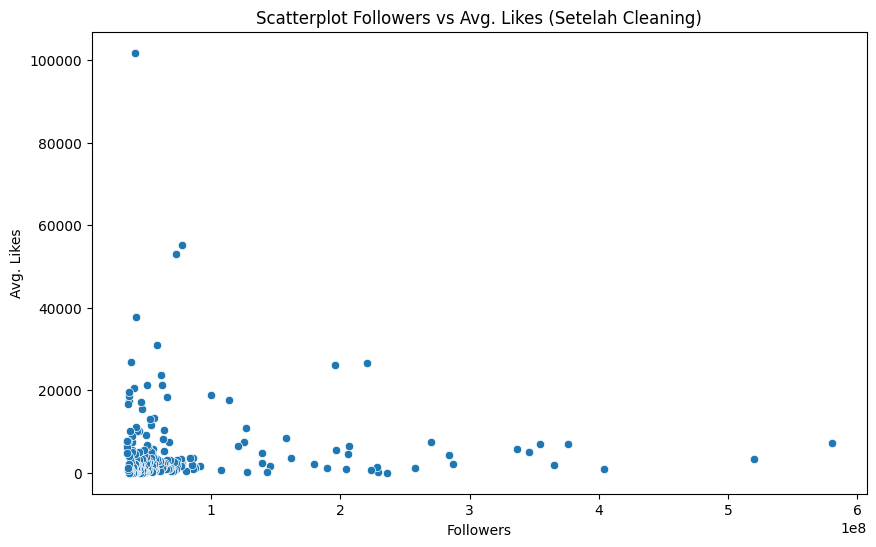

In [ ]:
#Scatterplot Followers vs Avg. Likes
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Followers', y='Avg. Likes')
plt.title('Scatterplot Followers vs Avg. Likes (Setelah Cleaning)')
plt.xlabel('Followers')
plt.ylabel('Avg. Likes')
plt.show()

In [ ]:
#Korelasi Pearson untuk mengukur hubungan
corr = df[['Followers', 'Avg. Likes']].corr().iloc[0,1]
print(f"Korelasi Pearson antara Followers dan Avg. Likes setelah cleaning: {corr:.3f}")

Korelasi Pearson antara Followers dan Avg. Likes setelah cleaning: -0.017


# **Modeling**

In [ ]:
df['is_recommended'] = (df['calculated_eng_rate'] > df['calculated_eng_rate'].median()).astype(int)
print(df[['Followers', 'Avg. Likes', 'Eng Rate', 'calculated_eng_rate', 'is_recommended']].head())

     Followers  Avg. Likes  Eng Rate  calculated_eng_rate  is_recommended
0  580100000.0      7310.0     0.001             0.001260               0
1  519900000.0      3410.0     0.014             0.000656               0
2  403700000.0       970.0     0.017             0.000240               0
3  375900000.0      7020.0     0.017             0.001868               0
4  365300000.0      1850.0     0.011             0.000506               0


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Category', 'channel_Info'], drop_first=True)
print(df_encoded.head())

   rank         name   Posts    Followers  Avg. Likes  Eng Rate  \
0     1    instagram  7300.0  580100000.0      7310.0     0.001   
1     2    cristiano  3400.0  519900000.0      3410.0     0.014   
2     3     leomessi  1000.0  403700000.0       970.0     0.017   
3     4  kyliejenner  7000.0  375900000.0      7020.0     0.017   
4     5  selenagomez  1800.0  365300000.0      1850.0     0.011   

   calculated_eng_rate  eng_rate_diff  Followers_num  Avg_Likes_num  ...  \
0             0.001260       0.098740    580100000.0         7310.0  ...   
1             0.000656       1.399344    519900000.0         3410.0  ...   
2             0.000240       1.699760    403700000.0          970.0  ...   
3             0.001868       1.698132    375900000.0         7020.0  ...   
4             0.000506       1.099494    365300000.0         1850.0  ...   

   Category_Unknown  Category_entertainment  Category_fashion  Category_food  \
0             False                   False             Fals

In [ ]:
#Target
y = df_encoded['is_recommended']

#Fitur
columns_to_drop = [
    'is_recommended',
    'Eng Rate',
    'calculated_eng_rate',
    'name',
    'rank'
]
X = df_encoded.drop(columns=columns_to_drop)
print(X.head())

    Posts    Followers  Avg. Likes  eng_rate_diff  Followers_num  \
0  7300.0  580100000.0      7310.0       0.098740    580100000.0   
1  3400.0  519900000.0      3410.0       1.399344    519900000.0   
2  1000.0  403700000.0       970.0       1.699760    403700000.0   
3  7000.0  375900000.0      7020.0       1.698132    375900000.0   
4  1800.0  365300000.0      1850.0       1.099494    365300000.0   

   Avg_Likes_num  Category_Craft/DIY  Category_Finance  \
0         7310.0               False             False   
1         3410.0               False             False   
2          970.0               False             False   
3         7020.0               False             False   
4         1850.0               False             False   

   Category_Health, Sports & Fitness  Category_Lifestyle  ...  \
0                              False               False  ...   
1                               True               False  ...   
2                               True           

In [ ]:
import joblib
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.joblib')

['model_columns.joblib']

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tipe data setelah persiapan:")
print(X_train.info())

Tipe data setelah persiapan:
<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 88 to 32
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Posts                              160 non-null    float64
 1   Followers                          160 non-null    float64
 2   Avg. Likes                         160 non-null    float64
 3   eng_rate_diff                      160 non-null    float64
 4   Followers_num                      160 non-null    float64
 5   Avg_Likes_num                      160 non-null    float64
 6   Category_Craft/DIY                 160 non-null    bool   
 7   Category_Finance                   160 non-null    bool   
 8   Category_Health, Sports & Fitness  160 non-null    bool   
 9   Category_Lifestyle                 160 non-null    bool   
 10  Category_News & Politics           160 non-null    bool   
 11  Category_Unknown                  

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("\nData training setelah scaling:")
print(X_train_scaled.head())


Data training setelah scaling:
      Posts  Followers  Avg. Likes  eng_rate_diff  Followers_num  \
0 -0.385962  -0.343082   -0.383688      -0.219041      -0.343082   
1 -0.298896  -0.521919   -0.296629      -0.484262      -0.521919   
2 -0.426787  -0.509835   -0.426444       0.742888      -0.509835   
3  2.080915   1.645870    2.082027      -0.606167       1.645870   
4 -0.173134  -0.461501   -0.175713      -0.244317      -0.461501   

   Avg_Likes_num  Category_Craft/DIY  Category_Finance  \
0      -0.383688           -0.079305               0.0   
1      -0.296629           -0.079305               0.0   
2      -0.426444           -0.079305               0.0   
3       2.082027           -0.079305               0.0   
4      -0.175713           -0.079305               0.0   

   Category_Health, Sports & Fitness  Category_Lifestyle  ...  \
0                          -0.420084           -0.079305  ...   
1                          -0.420084           -0.079305  ...   
2              

In [ ]:
joblib.dump(scaler, 'scaler.joblib')
print("File 'scaler.joblib' berhasil disimpan!")

File 'scaler.joblib' berhasil disimpan!


**Melatih Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# **Evaluasi**

In [ ]:
#Buat Prediksi
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
#Evaluasi Logistic Regression
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        20
           1       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Evaluasi Random Forest
print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        20
           1       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Interpretasi Model**

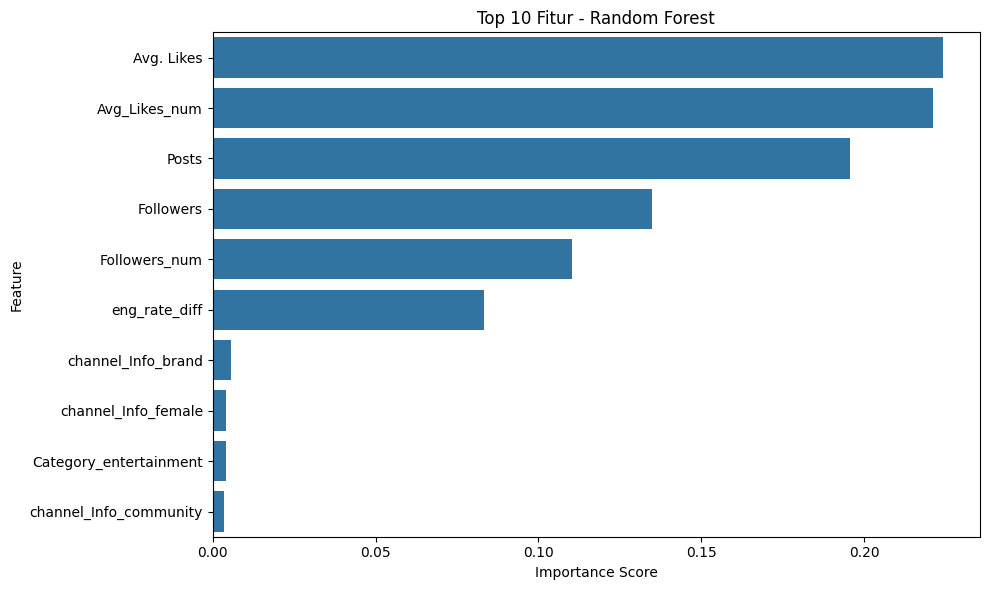

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Importance dari Random Forest
importances = rf.feature_importances_
features = X.columns
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10])
plt.title('Top 10 Fitur - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(rf, 'influencer_model.joblib')
print("File 'influencer_model.joblib' berhasil disimpan!")

File 'influencer_model.joblib' berhasil disimpan!
